In [5]:
import matplotlib.pyplot as plt
import pandas as pd
import geopandas as gpd
from descartes import PolygonPatch

datafile = 'kg_regions.csv'
shapefile = 'gadm36_KGZ_gpkg/gadm36_KGZ.gpkg'
merged = 'merged.csv'

In [6]:
gdf = gpd.read_file(shapefile).to_crs('+proj=robin')
gdf = gdf[['GID_1', 'NAME_1', 'GID_2', 'NAME_2', 'TYPE_2', 'ENGTYPE_2', 'geometry']]
gdf = gdf.rename(columns={'GID_1': 'id1', 'NAME_1': 'province', 'GID_2': 'id2', 'NAME_2': 'district'})
numbers = [1, 2, 3, 4, 5, 6, 7, 8, 9]
for x in numbers:
    gdf = gdf.replace(f'KGZ.{x}_1', f'KGZ_{x}')
    for y in numbers:
        gdf = gdf.replace(f'KGZ.{x}.{y}_1', f'KGZ_{x}.{y}')
# gdf['district_label_coords'] = gdf['district_geometry'].apply(lambda x: x.representative_point().coords[:])
# gdf['district_label_coords'] = [coords[0] for coords in gdf['district_label_coords']]
gdf

,id1,province,id2,district,TYPE_2,ENGTYPE_2,geometry
0,KGZ_1,Batken,KGZ_1.1,Batken,Rayon,District,"(POLYGON ((6203417.02618135 4268307.428236105,..."
1,KGZ_1,Batken,KGZ_1.2,Kadamjai,Rayon,District,(POLYGON ((6201919.666596727 4270320.200173633...
2,KGZ_1,Batken,KGZ_1.3,Lailak,Rayon,District,(POLYGON ((6040365.708206338 4250254.155546723...
3,KGZ_2,Biškek,KGZ_2.1,Biškek,Shaar,City,(POLYGON ((6390396.464086209 4577444.455273997...
4,KGZ_3,Chüy,KGZ_3.1,Alamüdün,Rayon,District,(POLYGON ((6386303.449574289 4582067.718314261...
5,KGZ_3,Chüy,KGZ_3.2,Chui,Rayon,District,(POLYGON ((6448074.695403462 4534269.871732781...
6,KGZ_3,Chüy,KGZ_3.3,Jaiyl,Rayon,District,(POLYGON ((6335319.667482986 4611926.932359271...
7,KGZ_3,Chüy,KGZ_3.4,Kemin,Rayon,District,(POLYGON ((6619543.392620769 4585334.136597544...
8,KGZ_3,Chüy,KGZ_3.5,Moskovsky,Rayon,District,(POLYGON ((6335319.667482986 4611926.932359271...
9,KGZ_3,Chüy,KGZ_3.6,Panfilov,Rayon,District,(POLYGON ((6328843.773709675 4535902.454444233...


In [7]:
kg_df = pd.read_csv(merged)
kg_df = kg_df.replace('KG-Y', 'KGZ_9')
kg_df = kg_df.replace('KG-N', 'KGZ_5')
kg_df = kg_df.replace('KG-O', 'KGZ_7')
kg_df = kg_df.replace('KG-C', 'KGZ_3')
kg_df = kg_df.replace('KG-T', 'KGZ_8')
kg_df = kg_df.replace('KG-J', 'KGZ_4')
kg_df = kg_df.replace('KG-B', 'KGZ_1')
kg_df = kg_df.replace('KG-GB', 'KGZ_2')
kg_df = kg_df[['iso_3166_2', 'Kyrgyz', 'Russian', 'Capital', 'Area (km²)', 'Population (1999)', 'Population (2009)', 'Population (2015 est.)', 'geometry', 'coords']]
kg_df = kg_df.rename(columns={'geometry': 'province_geometry', 'coords': 'province_label_coords'})
kg_df

,iso_3166_2,Kyrgyz,Russian,Capital,Area (km²),Population (1999),Population (2009),Population (2015 est.),province_geometry,province_label_coords
0,KGZ_9,Ысык-Көл облусу,Иссык-Кульская область,Karakol,43735,415500,425100,463900,"POLYGON ((6902876.921655496 4508556.187206767,...","(6730004.975327158, 4493246.19315928)"
1,KGZ_5,Нарын облусу,Нарынская область,Naryn,44160,248700,245300,264900,"POLYGON ((6770038.812439932 4400853.340582879,...","(6571730.357798302, 4422233.5646771705)"
2,KGZ_7,Ош облусу,Ошская область,Osh,28934,940600,1000000,1228400,"POLYGON ((6498649.885281271 4330320.935130951,...","(6381280.286926936, 4294133.658610921)"
3,KGZ_3,Чүй облусу,Чуйская область,Bishkek,19895,772200,790500,870300,"POLYGON ((6345188.223558725 4621898.910607853,...","(6407655.198113643, 4548037.8705777135)"
4,KGZ_8,Талас облусу,Таласская область,Talas,13406,200300,219600,247200,"POLYGON ((6316007.715208768 4530728.1197605, 6...","(6198562.9766897205, 4535520.710333765)"
5,KGZ_4,Жалалабат облусу,Джалал-Абадская область,Jalal-Abad,32418,869500,938600,1122400,"POLYGON ((6109894.422990353 4492398.335509213,...","(6323752.109548781, 4436606.766902731)"
6,KGZ_1,Баткен облусу,Баткенская область,Batken,17048,380200,380300,480700,"POLYGON ((6261861.198718467 4301560.704819838,...","(6238176.640056539, 4260727.001701494)"
7,KGZ_2,Бишкек шаары,Город Бишкек,Bishkek,170,787700,865100,937400,"POLYGON ((6394583.215435165 4587685.264378068,...","(6395074.006204751, 4578872.777502816)"


In [9]:
kg_admin_2 = gdf.merge(kg_df, left_on='id1', right_on='iso_3166_2', how='inner')
kg_admin_2 = kg_admin_2[['id1', 'province', 'Kyrgyz', 'Russian', 'Capital', 'Area (km²)', 'Population (1999)', 'Population (2009)', 'Population (2015 est.)', 'id2', 'district', 'province_geometry', 'province_label_coords', 'geometry']]
kg_admin_2

,id1,province,Kyrgyz,Russian,Capital,Area (km²),Population (1999),Population (2009),Population (2015 est.),id2,district,province_geometry,province_label_coords,geometry
0,KGZ_1,Batken,Баткен облусу,Баткенская область,Batken,17048,380200,380300,480700,KGZ_1.1,Batken,"POLYGON ((6261861.198718467 4301560.704819838,...","(6238176.640056539, 4260727.001701494)","(POLYGON ((6203417.02618135 4268307.428236105,..."
1,KGZ_1,Batken,Баткен облусу,Баткенская область,Batken,17048,380200,380300,480700,KGZ_1.2,Kadamjai,"POLYGON ((6261861.198718467 4301560.704819838,...","(6238176.640056539, 4260727.001701494)",(POLYGON ((6201919.666596727 4270320.200173633...
2,KGZ_1,Batken,Баткен облусу,Баткенская область,Batken,17048,380200,380300,480700,KGZ_1.3,Lailak,"POLYGON ((6261861.198718467 4301560.704819838,...","(6238176.640056539, 4260727.001701494)",(POLYGON ((6040365.708206338 4250254.155546723...
3,KGZ_2,Biškek,Бишкек шаары,Город Бишкек,Bishkek,170,787700,865100,937400,KGZ_2.1,Biškek,"POLYGON ((6394583.215435165 4587685.264378068,...","(6395074.006204751, 4578872.777502816)",(POLYGON ((6390396.464086209 4577444.455273997...
4,KGZ_3,Chüy,Чүй облусу,Чуйская область,Bishkek,19895,772200,790500,870300,KGZ_3.1,Alamüdün,"POLYGON ((6345188.223558725 4621898.910607853,...","(6407655.198113643, 4548037.8705777135)",(POLYGON ((6386303.449574289 4582067.718314261...
5,KGZ_3,Chüy,Чүй облусу,Чуйская область,Bishkek,19895,772200,790500,870300,KGZ_3.2,Chui,"POLYGON ((6345188.223558725 4621898.910607853,...","(6407655.198113643, 4548037.8705777135)",(POLYGON ((6448074.695403462 4534269.871732781...
6,KGZ_3,Chüy,Чүй облусу,Чуйская область,Bishkek,19895,772200,790500,870300,KGZ_3.3,Jaiyl,"POLYGON ((6345188.223558725 4621898.910607853,...","(6407655.198113643, 4548037.8705777135)",(POLYGON ((6335319.667482986 4611926.932359271...
7,KGZ_3,Chüy,Чүй облусу,Чуйская область,Bishkek,19895,772200,790500,870300,KGZ_3.4,Kemin,"POLYGON ((6345188.223558725 4621898.910607853,...","(6407655.198113643, 4548037.8705777135)",(POLYGON ((6619543.392620769 4585334.136597544...
8,KGZ_3,Chüy,Чүй облусу,Чуйская область,Bishkek,19895,772200,790500,870300,KGZ_3.5,Moskovsky,"POLYGON ((6345188.223558725 4621898.910607853,...","(6407655.198113643, 4548037.8705777135)",(POLYGON ((6335319.667482986 4611926.932359271...
9,KGZ_3,Chüy,Чүй облусу,Чуйская область,Bishkek,19895,772200,790500,870300,KGZ_3.6,Panfilov,"POLYGON ((6345188.223558725 4621898.910607853,...","(6407655.198113643, 4548037.8705777135)",(POLYGON ((6328843.773709675 4535902.454444233...


In [10]:
#setting parameters
colors = 7
cmap = 'Blues'
figsize = (16, 10)

# creating list of districts to label in for-loup below
districts=[]

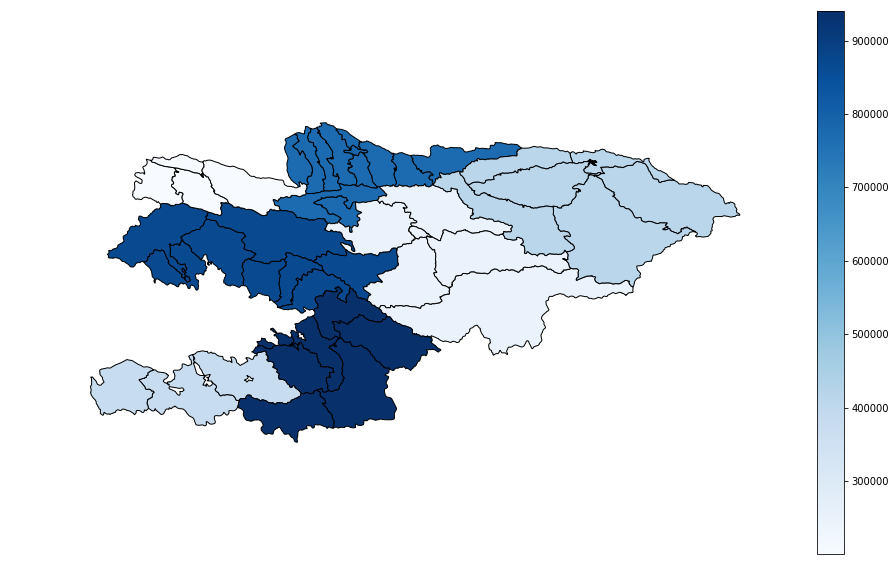

In [11]:


#plotting
ax = kg_admin_2.dropna().plot(column=kg_admin_2['Population (1999)'], cmap=cmap, figsize=figsize, k=colors, legend=True, edgecolor='black')
#     merged[merged[year].isna()].plot(ax=ax, color='#fafafa', hatch='///')
ax.set_axis_off()
#     ax.set_xlim([-1.5e7, 1.7e7])
# title = '{} of Kyrgyzstan by Region'.format(year)
# ax.set_title(title, fontdict={'fontsize': 20}, loc='center')
# for idx, row in merged.iterrows():
#     plt.annotate(s=row['Name'], xy=row['coords'],
#              color='#9fa560', fontsize=12, weight='bold', horizontalalignment='center')
#         plt.annotate(s=row['Russian'], xy=row['coords'],
#                  color='red', horizontalalignment='left')


#     plt.savefig(f'{year}.png')